# Illustration: Hollow plate RVE

## Problem definition

In this part, we are trying to show how the developed RVE simulator works by a simple RVE case called hollow plate RVE.

> The shematic of the RVE is given by

<center><img src="figures/hollow_plate_rve_schematic.png" width="300"></center>

<center> Fig.schematics of the hollow plate RVE  </center>

<br />

> **Geometry parameters to describe the RVE**

1. length: $L$, width: $W$. Usually, $L=W$; therefore, we only use one parameter (size) to define the shape of RVE
2. radius: $R$, which is the radius of the plate inside the square

> **Other parameters for simulation**

1. Material parameters:

- Young;s modulus, the default value is $100 \mathrm{Mpa}$
- Poission ratio , the default value is $0.3$

2. Loading:

- $ [ E_{xx}, E_{yy}, E_{xy} ]$

3. Mesh:

- mesh portion: divisions of every edges when meshing

# Realization


In [1]:
# import needed libraries
import sys
from collections import OrderedDict

from matplotlib import pyplot as plt

import rvesimulator

In [2]:
from rvesimulator.benchmarks.hollow_plate_sve import ElasticRegularLoads

In [3]:
# initialize the simulator
elatic_case = ElasticRegularLoads()
elatic_case.update_sim_info(strain=[0.05, 0.05, 0.05], print_info=True)

Simulation information: 

{
    "job_name": "hollow_plate",
    "radius": 0.2,
    "size": 1.0,
    "youngs_modulus": 100.0,
    "poisson_ratio": 0.3,
    "mesh_partition": 30,
    "strain": [
        0.05,
        0.05,
        0.05
    ],
    "num_cpu": 1,
    "platform": "ubuntu"
}


In [4]:
# create the doe
samples = {"radius": 0.15,
           "size": 1.0}

In [5]:
elatic_case_results = elatic_case.run_simulation(
    sample=samples, third_folder_index=0)

/home/jiaxiangyi/Documents/rvesimulator/tutorials/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<12 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :25.004813 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<12 out of 30 licenses remain available>.


In [6]:
elatic_case_results.keys()

dict_keys(['total_time', 'stress', 'plastic_energy', 'deformation_gradient', 'strain', 'total_volume'])

In [7]:
def plot_results(results, sample):
    fig, ax = plt.subplots(1, 3, figsize=(15, 3))
    pparam = dict(xlabel="$\epsilon_{xx}$", ylabel="$\sigma_{xx}$ (MPa)")
    ax[0].plot(
        results["strain"][:, 0, 0],
        results["stress"][:, 0, 0],
        label=f'radius= {sample["radius"]:.2f}, size= {sample["size"]:.2f}',
    )
    ax[0].legend()
    ax[0].set(**pparam)

    pparam = dict(xlabel="$\epsilon_{yy}$", ylabel="$\sigma_{yy}$ (MPa)")
    ax[1].plot(
        results["strain"][:, 1, 1],
        results["stress"][:, 1, 1],
        label=f'radius= {sample["radius"]:.2f}, size= {sample["size"]:.2f}',
    )
    ax[1].legend()
    ax[1].set(**pparam)

    pparam = dict(xlabel="$\epsilon_{xy}$", ylabel="$\sigma_{xy}$ (MPa)")
    ax[2].plot(
        results["strain"][:, 1, 0],
        results["stress"][:, 1, 0],
        label=f'radius= {sample["radius"]:.2f}, size= {sample["size"]:.2f}',
    )

    ax[2].legend()
    ax[2].set(**pparam)

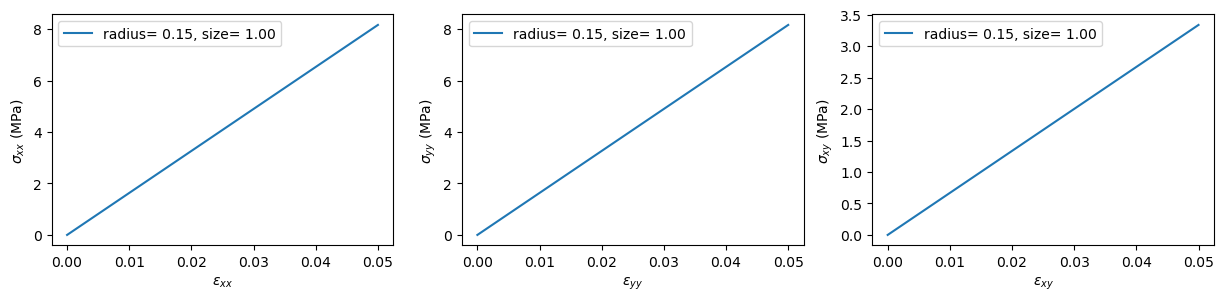

In [8]:
# plot the results
plot_results(elatic_case_results, sample=samples)

In [9]:
from rvesimulator.benchmarks.hollow_plate_sve import VonMisesPlasticRegularLoads

In [10]:
von_mises_case = VonMisesPlasticRegularLoads()
von_mises_case.update_sim_info(
    strain=[0.05, 0.05, 0.05], yield_stress=0.5, a=0.2, b=0.4, num_cpu=6, print_info=True)

Simulation information: 

{
    "job_name": "hollow_plate",
    "radius": 0.2,
    "size": 1.0,
    "youngs_modulus": 100.0,
    "poisson_ratio": 0.3,
    "hardening_law": "swift",
    "hardening_paras": {
        "yield_stress": 0.5,
        "a": 0.2,
        "b": 0.4
    },
    "mesh_partition": 30,
    "strain": [
        0.05,
        0.05,
        0.05
    ],
    "num_steps": 100,
    "simulation_time": 1.0,
    "num_cpu": 6,
    "platform": "ubuntu"
}


In [11]:
results_von_mises = von_mises_case.run_simulation(
    sample=samples, third_folder_index=0)

/home/jiaxiangyi/Documents/rvesimulator/tutorials/Data/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<12 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :25.005031 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<12 out of 30 licenses remain available>.


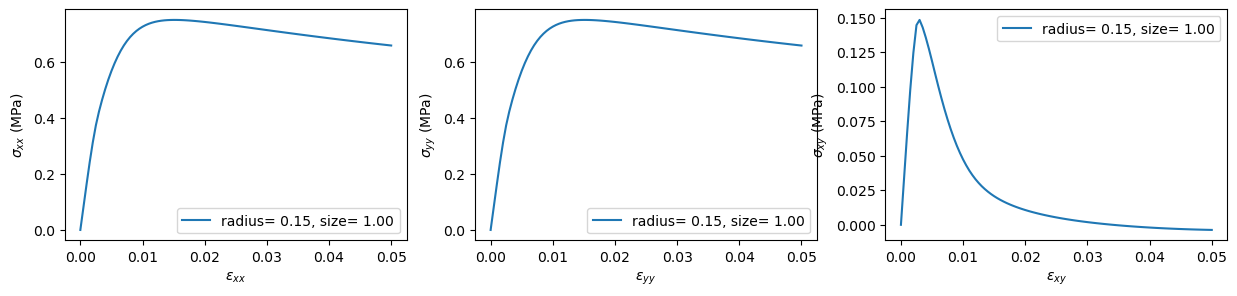

In [14]:
plot_results(results_von_mises, sample=samples)

In [13]:
from rvesimulator.additions.ampitudesampler import AmplitudeGenerator
from rvesimulator.benchmarks.hollow_plate_sve import VonMisesPlasticPathLoads

In [53]:

# create the doe
num_amplitude = 2
path_sampler = AmplitudeGenerator(num_dim=3)
paths = path_sampler.get_amplitude(
    num_amplitude=2,
    num_control=8,
    num_steps=100,
    arg_name="strain_amplitude",
    seed=1,
)

samples_dict = paths.to_dict("records")
print(paths)

                                    strain_amplitude
0  [[0.0, -0.010595103764888302, -0.0213440292295...
1  [[0.0, -0.017590200229051473, -0.0338813379698...


In [54]:

path_dependent_problem = VonMisesPlasticPathLoads()
path_dependent_problem.update_sim_info(
    strain=[0.05, 0.05, 0.05], yield_stress=0.5, a=0.2, b=0.4, num_cpu=6, print_info=True)

Simulation information: 

{
    "job_name": "hollow_plate",
    "radius": 0.2,
    "size": 1.0,
    "youngs_modulus": 100.0,
    "poisson_ratio": 0.3,
    "hardening_law": "swift",
    "hardening_paras": {
        "yield_stress": 0.5,
        "a": 0.2,
        "b": 0.4
    },
    "mesh_partition": 30,
    "strain": [
        0.05,
        0.05,
        0.05
    ],
    "strain_amplitude": null,
    "num_steps": 100,
    "simulation_time": 1.0,
    "num_cpu": 6,
    "platform": "ubuntu"
}


In [55]:
path_dependent_results = {}
# calculate the initial responses of simulation
for ii in range(len(samples_dict)):
    path_dependent_results[ii] = path_dependent_problem.run_simulation(
        sample=samples_dict[ii], third_folder_index=ii)

/home/jiaxiangyi/Documents/rvesimulator/tutorials/Data/Data/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<12 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :35.000751 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<12 out of 30 licenses remain available>.


/home/jiaxiangyi/Documents/rvesimulator/tutorials/Data/Data/Data/case_1
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<12 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :35.004466 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<12 out of 30 licenses remain available>.


In [56]:
def plot_path_dependent(results, index):
    fig, ax = plt.subplots(2, 3, figsize=(16, 8))
    pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{xx}$ (MPa)")
    ax[0, 0].plot(
        results[index]["strain"][:, 0, 0],
    )
    ax[0, 0].set(**pparam)
    pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{xy}$ (MPa)")
    ax[0, 1].plot(
        results[index]["strain"][:, 0, 1],
    )
    ax[0, 1].set(**pparam)
    pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{yy}$ (MPa)")
    ax[0, 2].plot(
        results[index]["strain"][:, 1, 1],
    )
    ax[0, 2].set(**pparam)

    pparam = dict(xlabel="time step", ylabel=r"$\sigma_{xx}$ (MPa)")
    ax[1, 0].plot(
        results[index]["stress"][:, 0, 0],
    )
    ax[1, 0].set(**pparam)
    pparam = dict(xlabel="time step", ylabel=r"$\sigma_{xy}$ (MPa)")
    ax[1, 1].plot(
        results[index]["stress"][:, 0, 1],
    )
    ax[1, 1].set(**pparam)
    pparam = dict(xlabel="time step", ylabel=r"$\sigma_{yy}$ (MPa)")
    ax[1, 2].plot(
        results[index]["stress"][:, 1, 1],

    )
    plt.show()

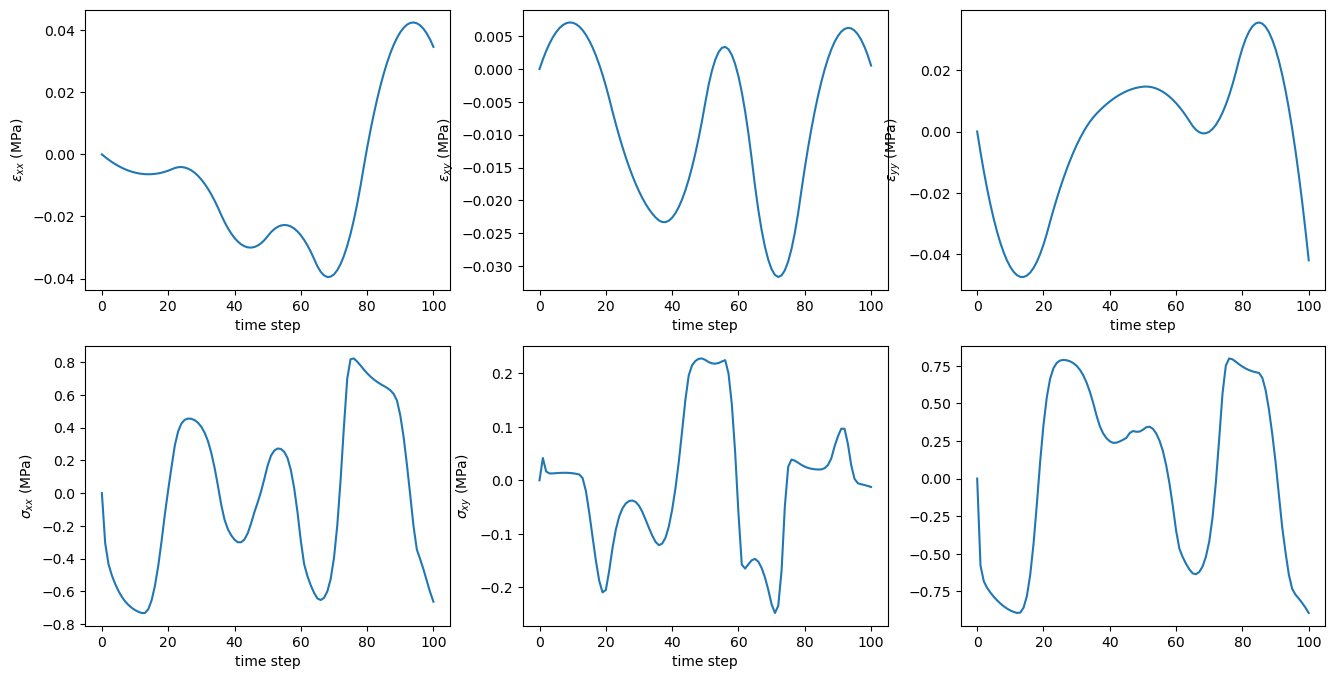

In [57]:
plot_path_dependent(path_dependent_results, 1)